<a href="https://colab.research.google.com/github/DarkKing656/for_school/blob/main/Homework_like_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Отчет о проделанной работе
#< Панов Александр Евгеньевич >
Задания:
1.	На основании статистики нужно было сформировать сводную таблицу
2.	Преобразовать выгрузку таким образом, чтобы ее можно было отправить коллегами из другого отдела для подсчета других метрик. Таблица должна быть максимально информативной. В ней не должно быть никак ошибок, недочетов связанные с проблемами, которые возникли при передаче нам информации от коллег.
#Выполнение задания 1:
После загрузки библиотек и данных, сразу бросается в глаза огромное количество неизвестных значений в столбцах : Показы, Клики, Регистрация, Заявка. Но не смотря на это я переношу данные в новую переменную и в ней уже создаю дополнительные столбцы (CTR, CPA Регистрация, CPA Заявки), после этого формирую сводную таблицу pivot_table, проверяю его с помощью визуализации и ярко вижу создаваемые проблемы из-за не приведенных в порядок данных, которые ставят под сомнение возможность своего анализа в таком виде.
#Выполнение задания 2:
Снова переношу изначальные данные в новую переменную, с которой буду работать в дальнейшем. В первую очередь я работаю с неизвестными значениями в столбцах : Показы, Клики, Регистрация, Заявка.  Они неизвестны парами, поэтому работаем мы с ними тоже по парно , если у нас Показы, Клики  то берем значение из Регистрации ведь пользователи не могли зарегистрироваться не увидев ничего и не кликнув на сайте. В обратном случае мы просто заполняем их нулями, так же работаем с дополнительными столбцами (CTR, CPA Регистрация, CPA Заявки), но у них еще надо заменять бесконечность на ноль , ведь такое случается только при нулевом ключевом значении. Далее мы приводим значения столбца Дата к типу pandas datatime чтоб было удобнее им оперировать в контексте анализа данных.
#Выводы по получившимся данным:
Анализируя получившиеся графики можно сказать что самые дорогие пользователи приходят с Google Ads и Яндекс.Директа, Самые дорогие регистрации у нас в TG ADS на них же самый большой расход АК и НДС, чаще всего регистрировать приходят с Яндекс.Директа . Вероятно стоит перенаправить траты из TG ads на более эффективный Яндекс.Директ.


In [1]:
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
# Считываем данные из листа 'Данные'
df = pd.read_excel('data.xlsx', sheet_name="Данные")

# Просмотр первых 5 строк
print(df.head())

        Дата    Месяц Рекламный канал                               Кампания  \
0 2022-12-01  Декабрь   Яндекс.Директ                   yd_brand_msk_network   
1 2022-12-01  Декабрь   Яндекс.Директ                    yd_brand_msk_search   
2 2022-12-01  Декабрь   Яндекс.Директ                    yd_brand_rf_network   
3 2022-12-01  Декабрь   Яндекс.Директ                     yd_brand_rf_search   
4 2022-12-01  Декабрь   Яндекс.Директ  yd_celevie_odarennye_kids_msk_network   

   Показы  Клики  Расход с НДС и АК  Регистрация  Заявка  
0     NaN    NaN                0.0          0.0     0.0  
1     NaN    NaN                0.0          6.0     0.0  
2     NaN    NaN                0.0          0.0     0.0  
3     NaN    NaN                0.0          5.0     1.0  
4     NaN    NaN                0.0          0.0     0.0  


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Дата               5862 non-null   datetime64[ns]
 1   Месяц              5862 non-null   object        
 2   Рекламный канал    5862 non-null   object        
 3   Кампания           5862 non-null   object        
 4   Показы             4685 non-null   float64       
 5   Клики              4685 non-null   float64       
 6   Расход с НДС и АК  5862 non-null   float64       
 7   Регистрация        5214 non-null   float64       
 8   Заявка             5214 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 412.3+ KB


In [25]:
df['Дата'] = pd.to_datetime(df['Дата'])
df_for_1=df.copy()


In [26]:
df_for_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Дата               5862 non-null   datetime64[ns]
 1   Месяц              5862 non-null   object        
 2   Рекламный канал    5862 non-null   object        
 3   Кампания           5862 non-null   object        
 4   Показы             4685 non-null   float64       
 5   Клики              4685 non-null   float64       
 6   Расход с НДС и АК  5862 non-null   float64       
 7   Регистрация        5214 non-null   float64       
 8   Заявка             5214 non-null   float64       
 9   CTR                4546 non-null   float64       
 10  CPA Регистрации    4026 non-null   float64       
 11  CPA Заявки         3884 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 549.7+ KB


In [7]:
df_for_1['CTR'] = (df_for_1['Клики'] / df_for_1['Показы']) * 100
df_for_1['CPA Регистрации'] = df_for_1['Расход с НДС и АК'] / df_for_1['Регистрация']
df_for_1['CPA Заявки'] = df_for_1['Расход с НДС и АК'] / df_for_1['Заявка']

In [8]:
df_for_1.head()

,Дата,Месяц,Рекламный канал,Кампания,Показы,Клики,Расход с НДС и АК,Регистрация,Заявка,CTR,CPA Регистрации,CPA Заявки
0,2022-12-01,Декабрь,Яндекс.Директ,yd_brand_msk_network,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
1,2022-12-01,Декабрь,Яндекс.Директ,yd_brand_msk_search,NaN,NaN,0.0,6.0,0.0,NaN,0.0,NaN
2,2022-12-01,Декабрь,Яндекс.Директ,yd_brand_rf_network,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
3,2022-12-01,Декабрь,Яндекс.Директ,yd_brand_rf_search,NaN,NaN,0.0,5.0,1.0,NaN,0.0,0.0
4,2022-12-01,Декабрь,Яндекс.Директ,yd_celevie_odarennye_kids_msk_network,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [9]:
pivot_table = df_for_1.pivot_table(
    index=['Месяц', 'Рекламный канал'],
    values=['Показы', 'Клики', 'CTR', 'Расход с НДС и АК', 'Регистрация', 'CPA Регистрации', 'CPA Заявки'],
    aggfunc='sum'
)

In [10]:
print(pivot_table)

                                 CTR    Клики      Показы  Расход с НДС и АК  \
Месяц   Рекламный канал                                                        
Декабрь Google Ads       4011.484989  17070.0   1277136.0      184128.022424   
        MyTarget           13.146485   2036.0    461882.0       50000.004000   
        TG Ads            412.029229  15069.0   2753685.0      621000.000000   
        ВКонтакте                NaN  32580.0   5558336.0      424816.270000   
        Яндекс.Директ    1815.159563  33699.0  11597467.0      428396.722440   
Ноябрь  Google Ads       3379.601756  19943.0   1508564.0      164960.004049   
        MyTarget           32.748437   3193.0    780116.0       66666.996000   
        TG Ads            280.976659  15980.0   2298097.0      530935.189600   
        ВКонтакте         516.811516  33586.0   7441839.0      442160.360000   
        Яндекс.Директ    3194.022975  30915.0   7308801.0      461498.990160   

                         Регистрация  


In [18]:
df_for_1['CPA Заявки'].head(100)

0           NaN
1           NaN
2           NaN
3       0.00000
4           NaN
        ...    
95          inf
96          inf
97    351.14976
98          inf
99          inf
Name: CPA Заявки, Length: 100, dtype: float64

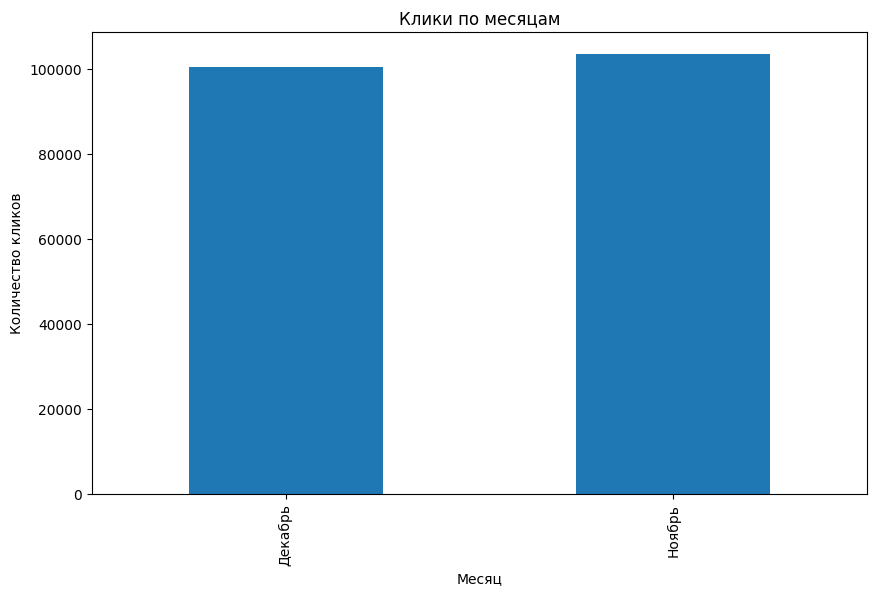

In [11]:
# Клики по месяцам
fig, ax = plt.subplots(figsize=(10, 6))
df_for_1.groupby('Месяц')['Клики'].sum().plot(kind='bar', ax=ax)
ax.set_title('Клики по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество кликов')
plt.show()

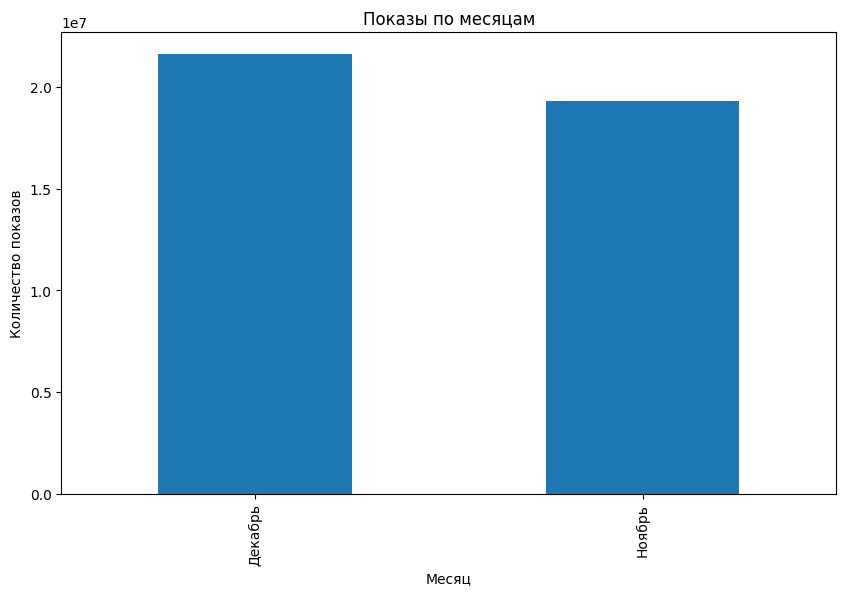

In [12]:
# Показы по месяцам
fig, ax = plt.subplots(figsize=(10, 6))
df_for_1.groupby('Месяц')['Показы'].sum().plot(kind='bar', ax=ax)
ax.set_title('Показы по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество показов')
plt.show()

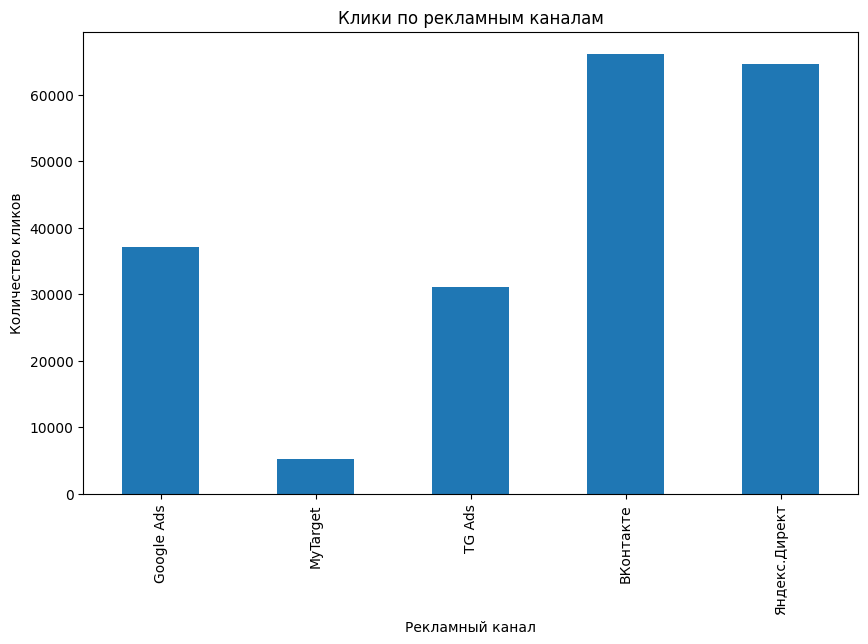

In [13]:
# Клики по каналам
fig, ax = plt.subplots(figsize=(10, 6))
df_for_1.groupby('Рекламный канал')['Клики'].sum().plot(kind='bar', ax=ax)
ax.set_title('Клики по рекламным каналам')
ax.set_xlabel('Рекламный канал')
ax.set_ylabel('Количество кликов')
plt.show()

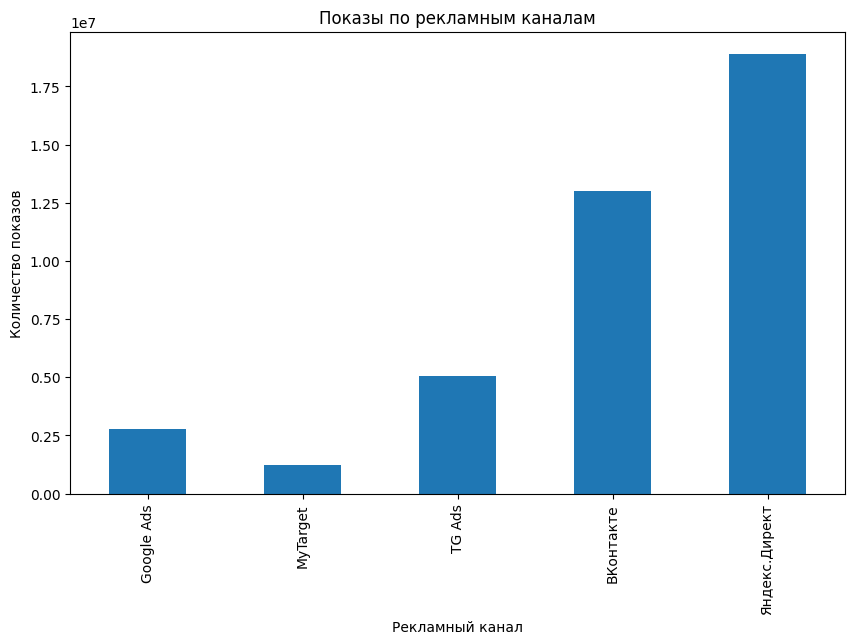

In [14]:
# Показы по каналам
fig, ax = plt.subplots(figsize=(10, 6))
df_for_1.groupby('Рекламный канал')['Показы'].sum().plot(kind='bar', ax=ax)
ax.set_title('Показы по рекламным каналам')
ax.set_xlabel('Рекламный канал')
ax.set_ylabel('Количество показов')
plt.show()

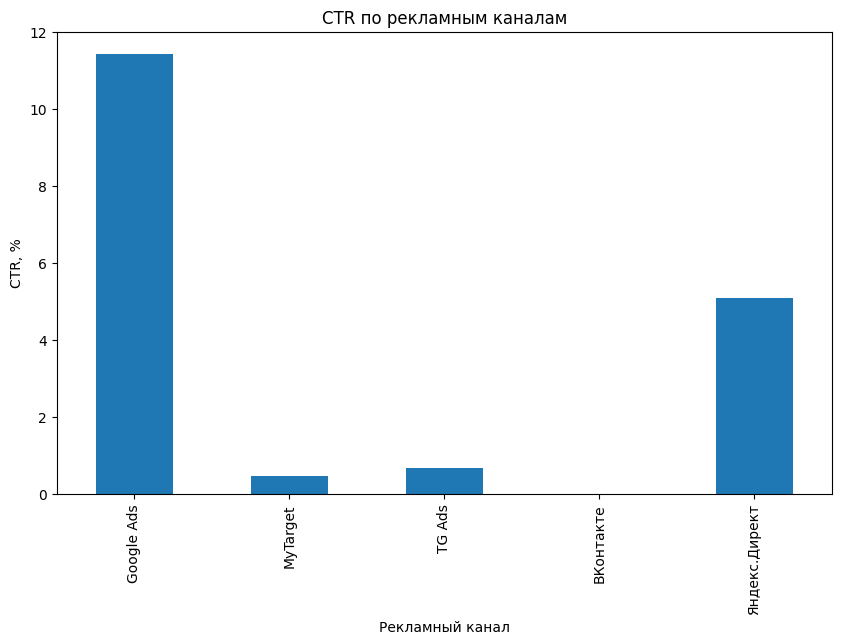

In [15]:
# CTR по каналам
fig, ax = plt.subplots(figsize=(10, 6))
df_for_1.groupby('Рекламный канал')['CTR'].mean().plot(kind='bar', ax=ax)
ax.set_title('CTR по рекламным каналам')
ax.set_xlabel('Рекламный канал')
ax.set_ylabel('CTR, %')
plt.show()

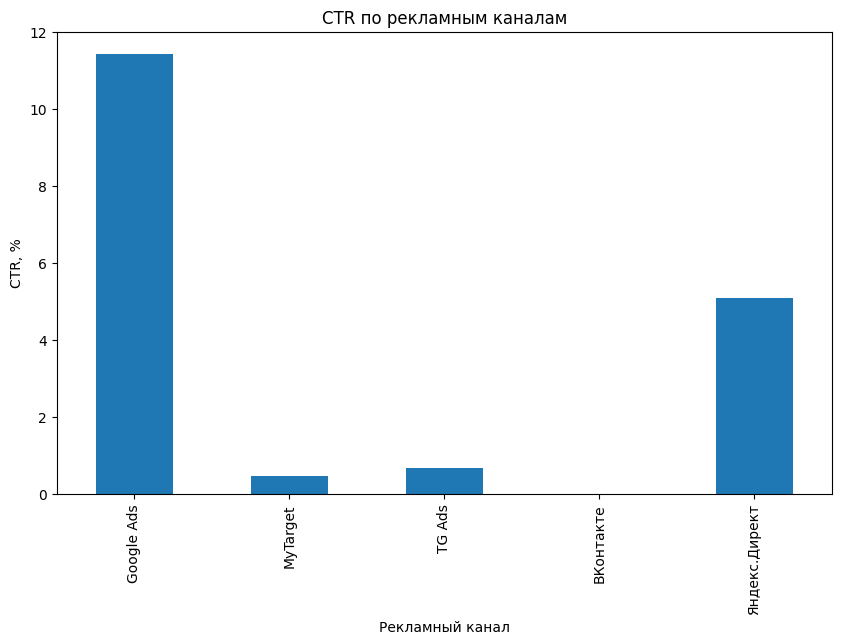

In [43]:
# CTR по каналам
fig, ax = plt.subplots(figsize=(10, 6))
df_for_1.groupby('Рекламный канал')['CTR'].mean().plot(kind='bar', ax=ax)
ax.set_title('CTR по рекламным каналам')
ax.set_xlabel('Рекламный канал')
ax.set_ylabel('CTR, %')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:741: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  labels = axis.get_majorticklabels() + axis.get_minorticklabels()


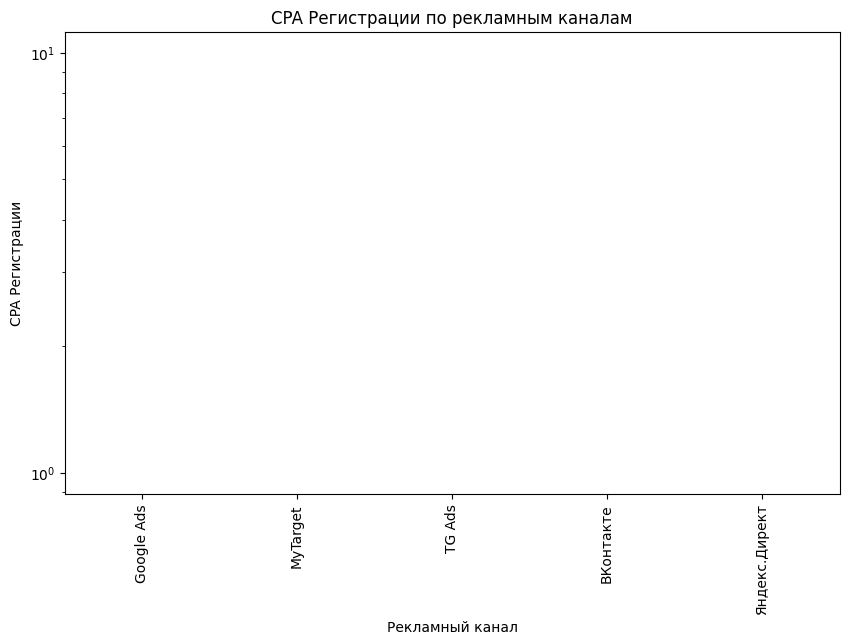

In [19]:
# CPA Регистрации по каналам
fig, ax = plt.subplots(figsize=(10, 6))

df_for_1.groupby('Рекламный канал')['CPA Регистрации'].mean().plot(kind='bar', ax=ax)
ax.set_title('CPA Регистрации по рекламным каналам')
ax.set_xlabel('Рекламный канал')
ax.set_ylabel('CPA Регистрации')
plt.show()


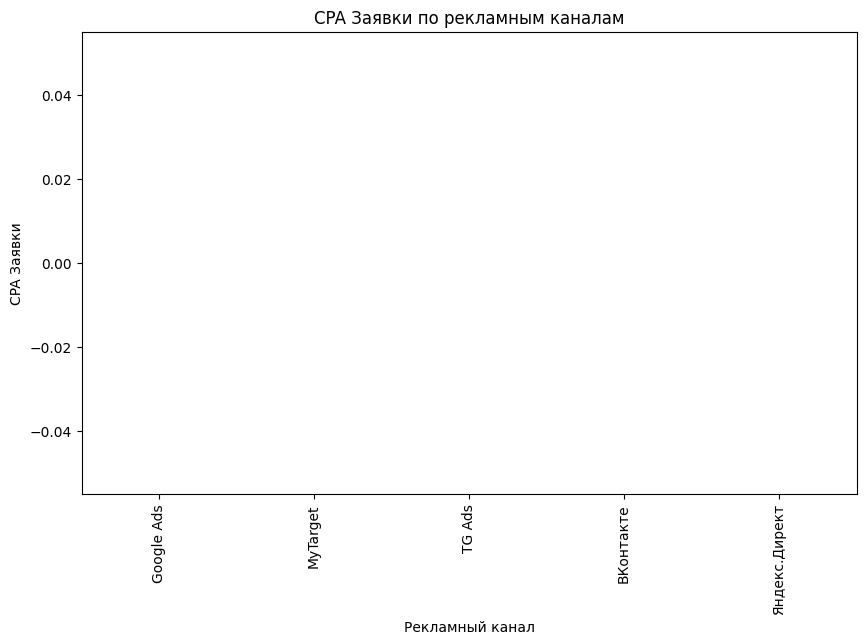

In [17]:
# CPA Заявки по каналам
fig, ax = plt.subplots(figsize=(10, 6))
df_for_1.groupby('Рекламный канал')['CPA Заявки'].mean().plot(kind='bar', ax=ax)
ax.set_title('CPA Заявки по рекламным каналам')
ax.set_xlabel('Рекламный канал')
ax.set_ylabel('CPA Заявки')
plt.show()


# Конец визуализации

#Начало работы над 2 заданием


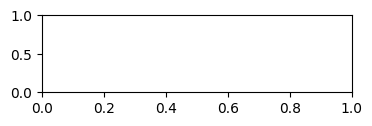

In [27]:
df_for_2=df.copy()

In [28]:
df_for_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Дата               5862 non-null   datetime64[ns]
 1   Месяц              5862 non-null   object        
 2   Рекламный канал    5862 non-null   object        
 3   Кампания           5862 non-null   object        
 4   Показы             4685 non-null   float64       
 5   Клики              4685 non-null   float64       
 6   Расход с НДС и АК  5862 non-null   float64       
 7   Регистрация        5214 non-null   float64       
 8   Заявка             5214 non-null   float64       
 9   CTR                4546 non-null   float64       
 10  CPA Регистрации    4026 non-null   float64       
 11  CPA Заявки         3884 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 549.7+ KB


In [29]:
# Заполняем пропуски в Клики, Показы
df_for_2['Клики'] = df_for_2['Клики'].fillna(df_for_2['Регистрация'])
df_for_2['Показы'] = df_for_2['Показы'].fillna(df_for_2['Регистрация'])

In [31]:
# Заполняем пропуски в Регистрация и Заявка нулями
df_for_2['Регистрация'] = df_for_2['Регистрация'].fillna(0)
df_for_2['Заявка'] = df_for_2['Заявка'].fillna(0)


In [39]:
# Пересчитываем показатели
df_for_2['CTR'] = (df_for_2['Клики'] / df_for_2['Показы']) * 100
df_for_2['CTR'] = df_for_2['CTR'].fillna(0)
df_for_2['CPA Регистрации'] = df_for_2['Расход с НДС и АК'] / df_for_2['Регистрация']
df_for_2['CPA Регистрации'] = df_for_2['CPA Регистрации'].replace([np.inf, -np.inf], 0)
df_for_2['CPA Регистрации'] = df_for_2['CPA Регистрации'].fillna(0)
df_for_2['CPA Заявки'] = df_for_2['Расход с НДС и АК'] / df_for_2['Заявка']
df_for_2['CPA Заявки'] = df_for_2['CPA Заявки'].replace([np.inf, -np.inf], 0)
df_for_2['CPA Заявки'] = df_for_2['CPA Заявки'].fillna(0)

In [40]:

# Проверяем, что в df_for_2 нет больше пропусков
print(df_for_2.isnull().sum())

Дата                 0
Месяц                0
Рекламный канал      0
Кампания             0
Показы               0
Клики                0
Расход с НДС и АК    0
Регистрация          0
Заявка               0
CTR                  0
CPA Регистрации      0
CPA Заявки           0
dtype: int64


In [45]:
pivot_table_2 = df_for_2.pivot_table(
    index=['Месяц', 'Рекламный канал'],
    values=['Показы', 'Клики', 'CTR', 'Расход с НДС и АК', 'Регистрация', 'CPA Регистрации', 'CPA Заявки'],
    aggfunc='sum'
)

print(pivot_table_2)

                           CPA Заявки  CPA Регистрации           CTR    Клики  \
Месяц   Рекламный канал                                                         
Декабрь Google Ads       26579.230427     30121.225000   4011.484989  17070.0   
        MyTarget          2263.020000     22606.707000     13.146485   2036.0   
        TG Ads             965.517000    233073.109547    412.029229  15069.0   
        ВКонтакте         4420.010000    122484.098167           NaN  32580.0   
        Яндекс.Директ    18918.959660     20676.376781  12715.159563  34089.0   
Ноябрь  Google Ads       18898.904734     34803.898577   3379.601756  19943.0   
        MyTarget             0.000000     18381.396000     32.748437   3193.0   
        TG Ads            3700.151200    208617.664893    280.976659  15980.0   
        ВКонтакте         8409.680000    141186.611667    516.811516  33586.0   
        Яндекс.Директ    22942.756630     21086.307959  12094.022975  31333.0   

                           

#Визуализация для 2 задания

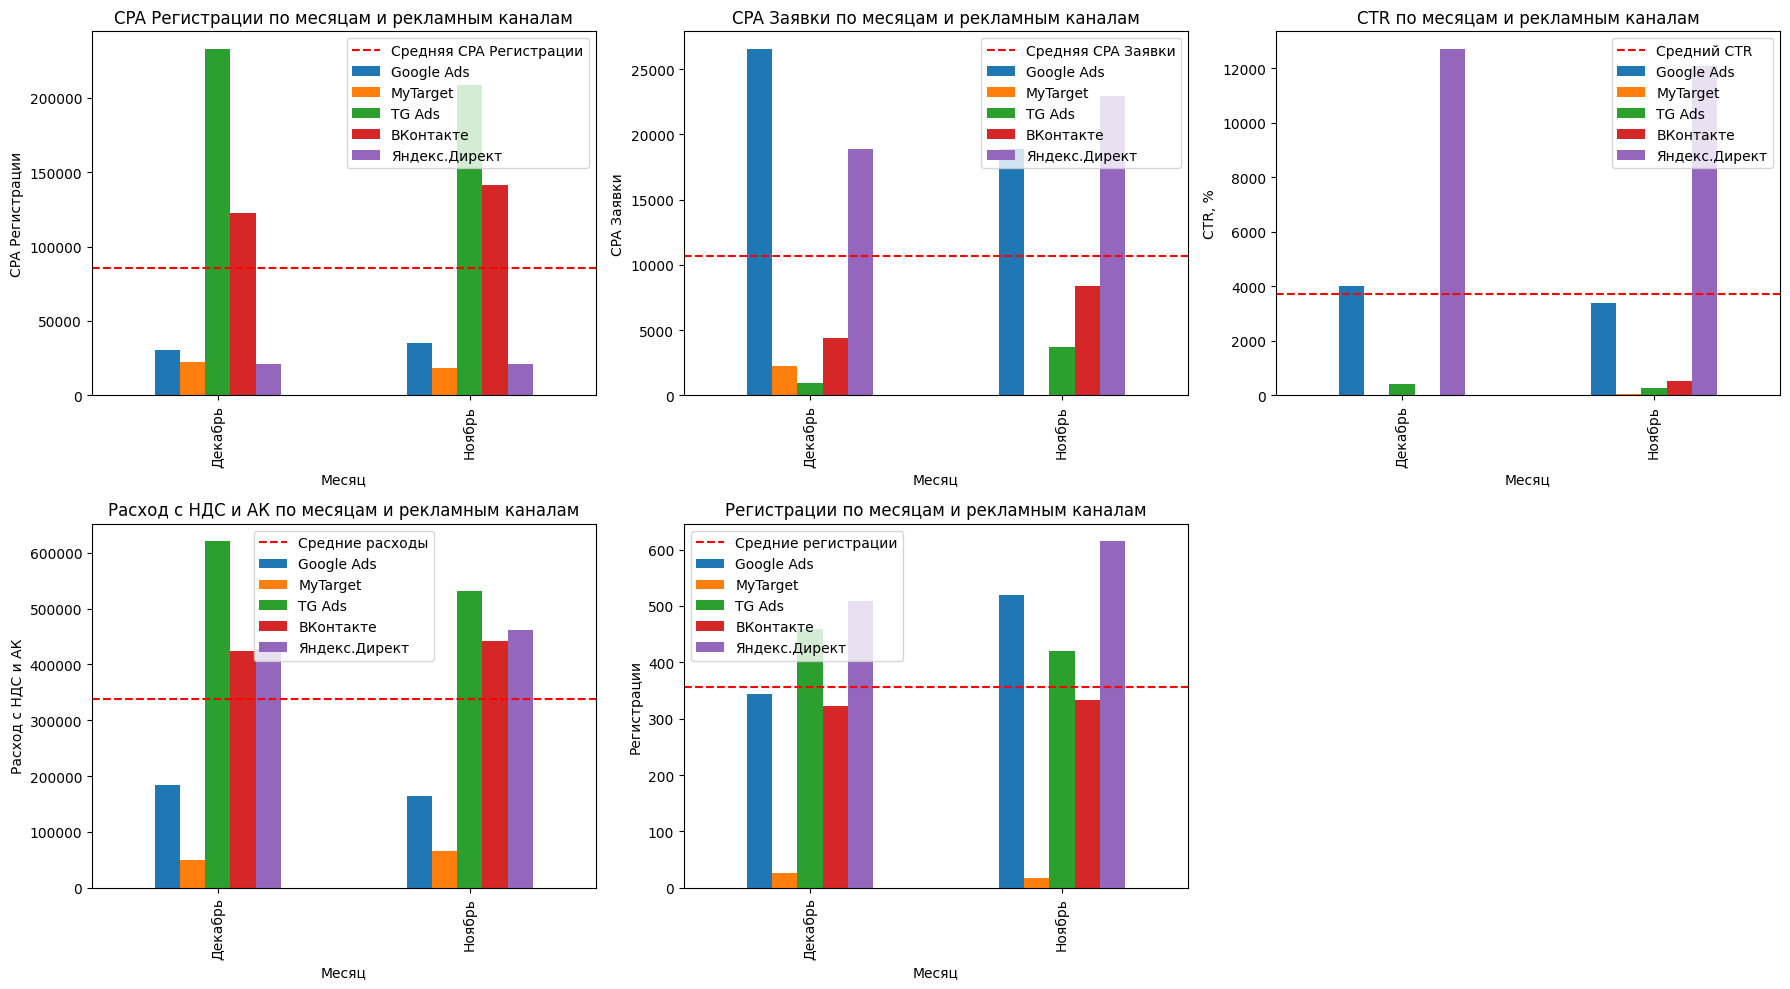

In [49]:
# Визуализация
plt.figure(figsize=(18, 10))

# График стоимости CPA Регистрации по месяцам и рекламным каналам
ax1 = plt.subplot(231)
pivot_table_2['CPA Регистрации'].unstack().plot(kind='bar', ax=ax1)
ax1.axhline(pivot_table_2['CPA Регистрации'].mean(), color='red', linestyle='--', label='Средняя CPA Регистрации')
ax1.set_title('CPA Регистрации по месяцам и рекламным каналам')
ax1.set_xlabel('Месяц')
ax1.set_ylabel('CPA Регистрации')
ax1.legend()

# График стоимости CPA Заявки по месяцам и рекламным каналам
ax2 = plt.subplot(232)
pivot_table_2['CPA Заявки'].unstack().plot(kind='bar', ax=ax2)
ax2.axhline(pivot_table_2['CPA Заявки'].mean(), color='red', linestyle='--', label='Средняя CPA Заявки')
ax2.set_title('CPA Заявки по месяцам и рекламным каналам')
ax2.set_xlabel('Месяц')
ax2.set_ylabel('CPA Заявки')
ax2.legend()

# График показателя CTR по месяцам и рекламным каналам
ax3 = plt.subplot(233)
pivot_table_2['CTR'].unstack().plot(kind='bar', ax=ax3)
ax3.axhline(pivot_table_2['CTR'].mean(), color='red', linestyle='--', label='Средний CTR')
ax3.set_title('CTR по месяцам и рекламным каналам')
ax3.set_xlabel('Месяц')
ax3.set_ylabel('CTR, %')
ax3.legend()

# График расходов (Расход с НДС и АК) по месяцам и рекламным каналам
ax4 = plt.subplot(234)
pivot_table_2['Расход с НДС и АК'].unstack().plot(kind='bar', ax=ax4)
ax4.axhline(pivot_table_2['Расход с НДС и АК'].mean(), color='red', linestyle='--', label='Средние расходы')
ax4.set_title('Расход с НДС и АК по месяцам и рекламным каналам')
ax4.set_xlabel('Месяц')
ax4.set_ylabel('Расход с НДС и АК')
ax4.legend()

# График количества Регистраций по месяцам и рекламным каналам
ax5 = plt.subplot(235)
pivot_table_2['Регистрация'].unstack().plot(kind='bar', ax=ax5)
ax5.axhline(pivot_table_2['Регистрация'].mean(), color='red', linestyle='--', label='Средние регистрации')
ax5.set_title('Регистрации по месяцам и рекламным каналам')
ax5.set_xlabel('Месяц')
ax5.set_ylabel('Регистрации')
ax5.legend()

plt.tight_layout()
plt.show()

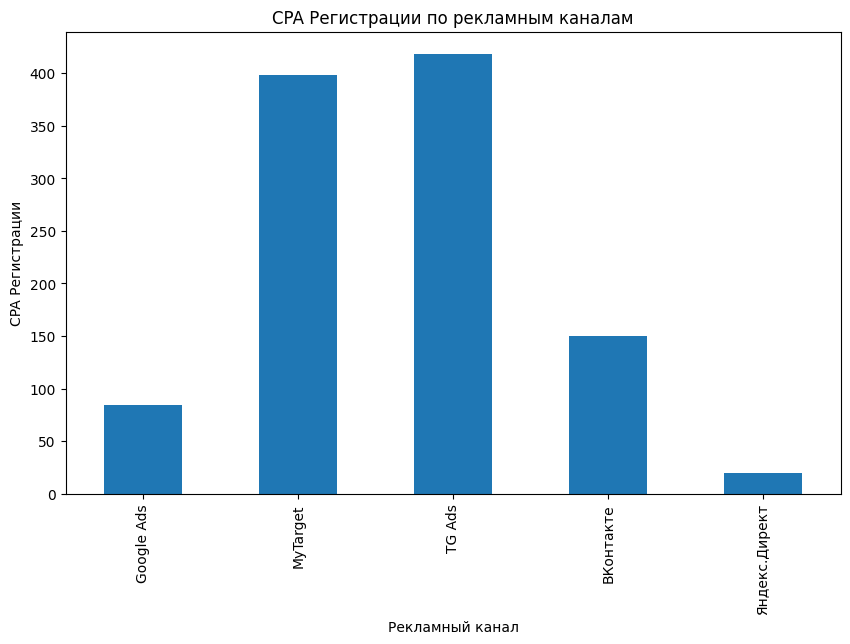

In [41]:
# CPA Регистрации по каналам
fig, ax = plt.subplots(figsize=(10, 6))

df_for_2.groupby('Рекламный канал')['CPA Регистрации'].mean().plot(kind='bar', ax=ax)
ax.set_title('CPA Регистрации по рекламным каналам')
ax.set_xlabel('Рекламный канал')
ax.set_ylabel('CPA Регистрации')
plt.show()


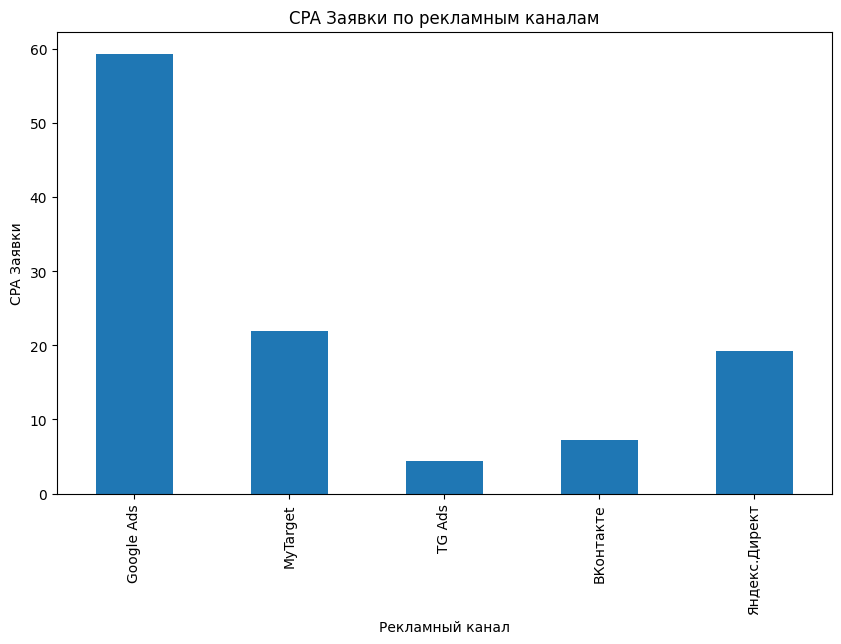

In [42]:
# CPA Заявки по каналам
fig, ax = plt.subplots(figsize=(10, 6))
df_for_2.groupby('Рекламный канал')['CPA Заявки'].mean().plot(kind='bar', ax=ax)
ax.set_title('CPA Заявки по рекламным каналам')
ax.set_xlabel('Рекламный канал')
ax.set_ylabel('CPA Заявки')
plt.show()

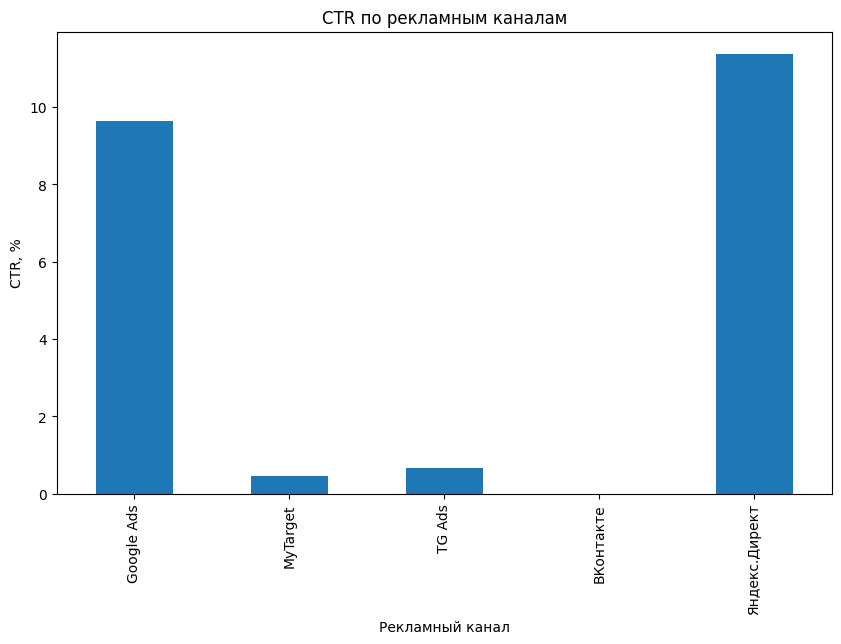

In [44]:
# CTR по каналам
fig, ax = plt.subplots(figsize=(10, 6))
df_for_2.groupby('Рекламный канал')['CTR'].mean().plot(kind='bar', ax=ax)
ax.set_title('CTR по рекламным каналам')
ax.set_xlabel('Рекламный канал')
ax.set_ylabel('CTR, %')
plt.show()